In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Load the dataset

In [4]:
data = pd.read_csv("C:\\Users\\Bala Vignesh.A\\Desktop\\SCMA 632\\HR_DataSet.csv")

In [5]:
display(data)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# Split the dataset into features (X) and target (y)

In [6]:
X = df.drop(['left'], axis=1)
y = df['left']


# Convert y to binary (0/1) since it's a numerical variable

In [7]:
y = (y == 1).astype(int)

# Split the data into training and validation sets

In [8]:
X = df.drop(['left'], axis=1)
y = df['left']

# Convert y to binary (0/1) since it's a numerical variable

In [9]:
y = (y == 1).astype(int)


# Split the data into training and validation sets

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Perform logistic regression

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [17]:
categorical_cols = ['Department', 'salary','promotion_last_5years']  
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\Bala Vignesh.A\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Predict probabilities on the validation data


In [21]:
y_pred_proba = log_reg.predict_proba(X_val)[:, 1]

# Evaluate the model using a confusion matrix

In [22]:
y_pred = (y_pred_proba >= 0.5).astype(int)
conf_mat = confusion_matrix(y_val, y_pred)
print("Confusion Matrix (Logistic Regression):")
print(conf_mat)

Confusion Matrix (Logistic Regression):
[[2111  183]
 [ 545  161]]


# Evaluate the model using an ROC curve

In [23]:
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
auc = roc_auc_score(y_val, y_pred_proba)
print("AUC (Logistic Regression): {:.2f}".format(auc))

AUC (Logistic Regression): 0.80


# Perform decision tree analysis

In [24]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

# Predict probabilities on the validation data

In [25]:
y_pred_proba_dt = dt.predict_proba(X_val)[:, 1]

# Evaluate the model using a confusion matrix

In [26]:
y_pred_dt = (y_pred_proba_dt >= 0.5).astype(int)
conf_mat_dt = confusion_matrix(y_val, y_pred_dt)
print("Confusion Matrix (Decision Tree):")
print(conf_mat_dt)


Confusion Matrix (Decision Tree):
[[2242   52]
 [  24  682]]


# Evaluate the model using an ROC curve

In [27]:
fpr_dt, tpr_dt, _ = roc_curve(y_val, y_pred_proba_dt)
auc_dt = roc_auc_score(y_val, y_pred_proba_dt)
print("AUC (Decision Tree): {:.2f}".format(auc_dt))

AUC (Decision Tree): 0.97


# Plot the ROC curve for both models

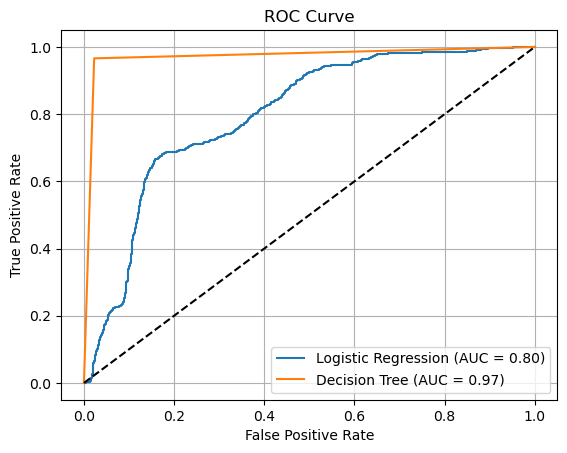

In [28]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(auc))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(auc_dt))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Compare the models

In [29]:
print("Logistic Regression Metrics:")
print("Accuracy: {:.2f}".format(accuracy_score(y_val, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_val, y_pred)))
print("Recall: {:.2f}".format(recall_score(y_val, y_pred)))
print("F1-score: {:.2f}".format(f1_score(y_val, y_pred)))

print("Decision Tree Metrics:")
print("Accuracy: {:.2f}".format(accuracy_score(y_val, y_pred_dt)))
print("Precision: {:.2f}".format(precision_score(y_val, y_pred_dt)))
print("Recall: {:.2f}".format(recall_score(y_val, y_pred_dt)))
print("F1-score: {:.2f}".format(f1_score(y_val, y_pred_dt)))

Logistic Regression Metrics:
Accuracy: 0.76
Precision: 0.47
Recall: 0.23
F1-score: 0.31
Decision Tree Metrics:
Accuracy: 0.97
Precision: 0.93
Recall: 0.97
F1-score: 0.95
